RepeatMasker settings:
- clade:Mammal
- genome:Rabbit
- group:Variation and Repeats
- table:rmsk
- track:RepeatMasker

In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numt_array = pd.read_csv(home_dir + r'numt_master_array_with_1000_flanking.csv')
numt_array = numt_array.drop(0)
numt_array

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)"
1,3398,0.000000e+00,0.000000e+00,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,GGGCAATTCAATATTCATAAATCAATAAACATCATAAATCACACCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,GCTTTTAACAGACCGAAACTTAAATACAACCTTCTTTGATCCTGCA...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...
2,3120,0.000000e+00,0.000000e+00,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,AAAGCAATTAAATTTTTAACAAAATTTTTAGGCTTAATGAACTAGA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...
3,1888,0.000000e+00,0.000000e+00,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,TTCTAATTACAGCACTCTACTCCCTCTACATTTTATCAACCAAAGA...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TTATTATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTT...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...
4,1824,0.000000e+00,0.000000e+00,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,TGCCACACCTCCCATGGGATAAAGAGGAAAGGGTCTGGTGCCATGC...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,CATCTCCTGAGTGCAAACCAGGTGCTTTAATTAAGCTAAATCCTCC...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...
5,1344,0.000000e+00,0.000000e+00,AAGW02081594,20039,11341,2339,2362,+,+,24576,ATAGCATCCTTTTCATGATCTAATCTCACTATTATTTTAATAGGGA...,ATGGCCTCCTTCTCATGATCTAACCTCACAATCATCCTGATAGGGA...,TCTTTCTCATTGTCCACTGTGCCTGTCAAAAAATAAAAAGAAAAAG...,GGCTGGTGCTGCAGCTCAGTAGGCTAATCTTCCACCTAGCGGCGTG...,CCTAAACTTCTCAACCACATTTTTTTCAGATGCCTTATCCACTCCT...,ATCCTACCTCGTCCCCTTCAAAAACCACCCAATCCCCCATATTTTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,80,2.800000e-21,5.000000e-25,GL019047,205885,9539,243,247,+,-,247428,GATCAGTTTTCAAAGTGCTTTTATGGTACTGA----AGTACAATAG...,GATCAGTTTTCGAAGTGTTTAAGTGGAACTATTTCGAGGACAATAG...,TTAATTAGATGGCTAAGATTGTGTGTTGAATAAATAGAGTAGTAAT...,AGTTAGGGAGGAGTTGTTAATTTTGTCTGTTATGCATAGAGCTCAT...,CACCTACTATGTAGTAGCTCACTTCCACTATGTCCTATCTATGGGG...,CCTATCTATGATTTAGACTCGCTATGAAGCTAAACAGCGCTAGCCT...
149,77,7.500000e-20,1.300000e-23,AAGW02081404,17858,882,136,140,+,-,27691,GTACGTgcgtacgtgcgtacgggtgtacgggtgtacgggtgtacgg...,gtgcgtacgggtgtacgtgcgtgcgtacgggtgtacgtgcgtgcgt...,TTGTAAAGGTGCGTTTTAAATTTCAAAATTTAGGTGCCCTGAGCTG...,GTACGTGCGTACGTGCGTACGGGTGTACGGGTGTACGTGCGTGCGT...,TGGACAAGTAGCATCTGTCCTCTACTTCACCACCATCCTTATTCTT...,GCACGTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGT...
150,75,6.700000e-19,1.200000e-22,GL019311,22172,5436,218,228,+,-,80506,ATAATTAGTCAAGTTATAGAGGAAGAAAATAG----ATTAGTTTTA...,ATAATTGATACAGCTACAGAGGTGGAGAATAAGTTAATTACTTTTA...,CCCGCGGGTCGTGCGCCAGGTGAGGGCGCAGGTTCGGCCCGGGCCC...,GTTTAAAATGTATGTGCCCTGGGGCTGGCGCGCTGGTGCAGTAGGT...,TCTTATCATTATTACACGATGAGGTAATCAAACAGAGCGACTCAAC...,TATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTTTAAT...
151,74,2.000000e-18,3.600000e-22,21,11379492,15954,321,320,+,-,15578276,CTAATTCATTACGTAAAAAGATAAAAGGGTTAATCTTTGCTTTTTA...,CTAATTCATTATGCAAAAGG-TAAGAGAAGTAATCTCTGCTTTTTT...,ATGACAGCCACAGTGAGCACTAAAGTTCTGTTGCACAGAATTGTTT...,GCATGTTTAAGTTTATGATTTAAATTTAAATTAGCTTAGGTTGGCT...,TGGACTAGAAATCTCTAGTCTAGGCTAAAGTTAATGTAGCTTAACA...,CTAGAAAATCCTTAGCAAAAAGAATTTTAGTTAAGAACCCCGAAAC...


In [4]:
g_ids = numt_array['g_id']
g_ids

1                 1
2          GL019308
3          GL019308
4      AAGW02081594
5      AAGW02081594
           ...     
148        GL019047
149    AAGW02081404
150        GL019311
151              21
152        GL018744
Name: g_id, Length: 152, dtype: object

In [5]:
chromosome_length = numt_array['g_size']
chromosome_length.index = g_ids
chromosome_length

g_id
1               194850757
GL019308            88228
GL019308            88228
AAGW02081594        24576
AAGW02081594        24576
                  ...    
GL019047           247428
AAGW02081404        27691
GL019311            80506
21               15578276
GL018744          2220855
Name: g_size, Length: 152, dtype: int64

In [175]:
flank_size = 10000

In [176]:
#the start positions of the upstream flankings
u_flanking_start = numt_array['g_start'].apply(lambda start : start - flank_size)
u_flanking_start[u_flanking_start < 0] = 1
u_flanking_start.index = g_ids
u_flanking_start

g_id
1               114721432
GL019308            57160
GL019308            52527
AAGW02081594         4016
AAGW02081594        10039
                  ...    
GL019047           195885
AAGW02081404         7858
GL019311            12172
21               11369492
GL018744           663556
Name: g_start, Length: 152, dtype: int64

In [177]:
#the end positions of the upstream flankings (which are the genomic_starts of the numts)
u_flanking_end = numt_array['g_start']
u_flanking_end.index = g_ids
u_flanking_end

g_id
1               114731432
GL019308            67160
GL019308            62527
AAGW02081594        14016
AAGW02081594        20039
                  ...    
GL019047           205885
AAGW02081404        17858
GL019311            22172
21               11379492
GL018744           673556
Name: g_start, Length: 152, dtype: int64

In [178]:
#start position of downstream_flanking (which is equal to the ends of the numts)
numt_array['g_length'].index = g_ids
d_flanking_start = numt_array['g_start'] + numt_array['g_length']
d_flanking_start.index = g_ids
d_flanking_start

g_id
1               114736112
GL019308            72052
GL019308            65966
AAGW02081594        17056
AAGW02081594        22378
                  ...    
GL019047           206128
AAGW02081404        17994
GL019311            22390
21               11379813
GL018744           673875
Length: 152, dtype: int64

In [179]:
#end position of downstream_flanking
numt_ends = numt_array['g_start'] + numt_array['g_length']
d_flanking_end = numt_ends.apply(lambda end : end + flank_size)
d_flanking_end

g_id
1               114746112
GL019308            82052
GL019308            75966
AAGW02081594        27056
AAGW02081594        32378
                  ...    
GL019047           216128
AAGW02081404        27994
GL019311            32390
21               11389813
GL018744           683875
Length: 152, dtype: int64

In [180]:
#get the regions
indices = np.arange(0,len(u_flanking_start),1)
upstream_flankings = pd.Series(index = indices)
downstream_flankings = pd.Series(index = indices)
for index, u_start in enumerate(u_flanking_start):
    upstream_rm_item = (str(g_ids[index + 1]) + ':' +str(u_start) + '-' + str(u_flanking_end[index]))
    upstream_flankings[index] = upstream_rm_item
    downstream_rm_item = ''
    if chromosome_length[index] < d_flanking_end[index]:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                          '-' + str(chromosome_length[index]))
    else:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                              '-' + str(d_flanking_end[index]))
    downstream_flankings[index] = downstream_rm_item

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [181]:
upstream_flankings

0         1:114721432-114731432
1          GL019308:57160-67160
2          GL019308:52527-62527
3       AAGW02081594:4016-14016
4      AAGW02081594:10039-20039
                 ...           
147      GL019047:195885-205885
148     AAGW02081404:7858-17858
149        GL019311:12172-22172
150        21:11369492-11379492
151      GL018744:663556-673556
Length: 152, dtype: object

In [182]:
downstream_flankings

0         1:114736112-114746112
1          GL019308:72052-82052
2          GL019308:65966-75966
3      AAGW02081594:17056-24576
4      AAGW02081594:22378-24576
                 ...           
147      GL019047:206128-216128
148    AAGW02081404:17994-27691
149        GL019311:22390-32390
150        21:11379813-11389813
151      GL018744:673875-683875
Length: 152, dtype: object

In [211]:
#writing flanking output
with open(home_dir + '10000_upstream_flankings.bed','w') as up_out, open(home_dir + '10000_downstream_flankings.bed','w') as down_out:
    upstream_flankings.apply(lambda line : up_out.write(line + '\n'))
    downstream_flankings.apply(lambda line : down_out.write(line + '\n'))

In [184]:
numtless_ids = pd.Series(numt_array['g_id'].unique())
numtless_ids

0                1
1         GL019308
2     AAGW02081594
3         GL019326
4         GL018741
5               18
6                9
7               12
8         GL018705
9               17
10        GL018700
11              19
12        GL019465
13        GL018817
14              13
15        GL018826
16        GL018748
17               2
18               7
19              16
20        GL018786
21        GL018706
22               4
23    AAGW02081404
24        GL019271
25        GL019056
26        GL019383
27        GL019525
28        GL019149
29        GL018925
30              20
31    AAGW02083714
32        GL018992
33    AAGW02079688
34        GL019086
35        GL019010
36              15
37        GL019047
38        GL018862
39              11
40        GL019311
41              14
42               3
43        GL019235
44              21
45        GL018744
dtype: object

In [155]:
#get numtless sequences
def get_numtless_sequences(g_id):
    directory = home_dir + 'numtless_sequences/'
    filename = '%s.fasta' % g_id
    with open(directory + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            sequence = np.nan
    return sequence

In [27]:
numtless_sequences = numtless_ids.apply(get_numtless_sequences)
numtless_sequences.index = numtless_ids
numtless_sequences

1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018826  

In [28]:
numtless_sequences = numtless_sequences.drop(labels = ['AAGW02081404'])

In [29]:
numtless_sequences

1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018826  

In [185]:
identifiers = pd.Series(numtless_sequences.index.values)
numt_count = identifiers.apply(lambda g_id : list(numt_array['g_id']).count(g_id))
numt_count.index = numtless_sequences.index.values
numt_count

1               9
GL019308        5
AAGW02081594    4
GL019326        6
GL018741        5
18              4
9               4
12              3
GL018705        1
17              3
GL018700        1
19              1
GL019465        5
GL018817        4
13              2
GL018826        8
GL018748        3
2               2
7               3
16              1
GL018786        1
GL018706        1
4               8
GL019271        1
GL019056        1
GL019383        2
GL019525        1
GL019149        2
GL018925        2
20              2
AAGW02083714    1
GL018992        1
AAGW02079688    3
GL019086        1
GL019010        3
15              5
GL019047        3
GL018862        2
11              1
GL019311        2
14              1
3               1
GL019235        1
21              1
GL018744        1
dtype: int64

In [186]:
lengths = numtless_sequences.apply(lambda sequence : len(sequence))
lengths

1               194841325
GL019308            77650
AAGW02081594        16966
GL019326            75171
GL018741          2346725
18               69798111
9               116249691
12              155354606
GL018705          6123776
17               85007110
GL018700         13460905
19               57279035
GL019465            47584
GL018817           943909
13              143360353
GL018826           917140
GL018748          2145859
2               174331712
7               173683288
16               84478782
GL018786          1165074
GL018706          5787096
4                91385928
GL019271            83514
GL019056           198795
GL019383            58074
GL019525            42305
GL019149           135766
GL018925           585214
20               33190240
AAGW02083714         5154
GL018992           287663
AAGW02079688        72642
GL019086           290499
GL019010           276843
15              109051050
GL019047           246181
GL018862           659056
11          

In [208]:
#function for sampling genome
def sampling_genome(g_id):
    global sum_ranges
    number = numt_count[g_id]
    sample_ranges = []
    for i in range(0,number,1):
        np.random.seed(i + 5)
        length = lengths[g_id]
        sequence = numtless_sequences[g_id]
        range_max = length - flank_size
        if range_max < 0:
            range_max = 2
        range_start = np.random.randint(0, range_max)
        range_end = range_start + flank_size
        if range_end >= length:
            range_end == length-1
        sample_ranges.append(g_id + ':' + str(range_start) + '-' + str(range_end))
    sum_ranges += sample_ranges
    return sample_ranges

In [209]:
#get the sample ranges
sum_ranges = []
identifiers.index = identifiers
samples = identifiers.apply(sampling_genome)
sum_ranges

['1:148147043-148157043',
 '1:76708746-76718746',
 '1:59306159-59316159',
 '1:47736148-47746148',
 '1:44556670-44566670',
 '1:91571465-91581465',
 '1:24940223-24950223',
 '1:125253451-125263451',
 '1:118980946-118990946',
 'GL019308:35683-45683',
 'GL019308:31626-41626',
 'GL019308:61615-71615',
 'GL019308:25940-35940',
 'GL019308:55934-65934',
 'AAGW02081594:2915-12915',
 'AAGW02081594:2761-12761',
 'AAGW02081594:4271-14271',
 'AAGW02081594:4547-14547',
 'GL019326:35683-45683',
 'GL019326:31626-41626',
 'GL019326:61615-71615',
 'GL019326:4547-14547',
 'GL019326:57726-67726',
 'GL019326:17673-27673',
 'GL018741:1346403-1356403',
 'GL018741:1211274-1221274',
 'GL018741:585903-595903',
 'GL018741:1642947-1652947',
 'GL018741:872796-882796',
 '18:13929315-13939315',
 '18:42846921-42856921',
 '18:59306159-59316159',
 '18:47736148-47746148',
 '9:13929315-13939315',
 '9:76708746-76718746',
 '9:59306159-59316159',
 '9:47736148-47746148',
 '12:148147043-148157043',
 '12:76708746-76718746',
 '1

In [205]:
#writing output file
with open(home_dir + '10000_repeat_samples.bed', 'w') as outfile:
    pd.Series(sum_ranges).apply(lambda sample_range : outfile.write(sample_range + '\n'))

In [212]:
#read upstream repeats
up_100_repeats = pd.read_csv(home_dir + r'repeats/100_up_repeats', sep = '\t')
up_100_repeats = up_100_repeats.set_index('genoName')
up_500_repeats = pd.read_csv(home_dir + r'repeats/500_up_repeats', sep = '\t')
up_500_repeats = up_500_repeats.set_index('genoName')
up_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_up_repeats', sep = '\t')
up_1000_repeats = up_1000_repeats.set_index('genoName')
up_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_up_repeats', sep = '\t')
up_5000_repeats = up_5000_repeats.set_index('genoName')
up_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_up_repeats', sep = '\t')
up_10000_repeats = up_10000_repeats.set_index('genoName')

In [213]:
#read downstream repeats
down_100_repeats = pd.read_csv(home_dir + r'repeats/100_down_repeats', sep = '\t')
down_100_repeats = down_100_repeats.set_index('genoName')
down_500_repeats = pd.read_csv(home_dir + r'repeats/500_down_repeats', sep = '\t')
down_500_repeats = down_500_repeats.set_index('genoName')
down_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_down_repeats', sep = '\t')
down_1000_repeats = down_1000_repeats.set_index('genoName')
down_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_down_repeats', sep = '\t')
down_5000_repeats = down_5000_repeats.set_index('genoName')
down_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_down_repeats', sep = '\t')
down_10000_repeats = down_10000_repeats.set_index('genoName')

In [214]:
#read sample repeats
sample_100_repeats = pd.read_csv(home_dir + r'repeats/100_sample_repeats', sep = '\t')
sample_100_repeats = sample_100_repeats.set_index('genoName')
sample_500_repeats = pd.read_csv(home_dir + r'repeats/500_sample_repeats', sep = '\t')
sample_500_repeats = sample_500_repeats.set_index('genoName')
sample_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_sample_repeats', sep = '\t')
sample_1000_repeats = sample_1000_repeats.set_index('genoName')
sample_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_sample_repeats', sep = '\t')
sample_5000_repeats = sample_5000_repeats.set_index('genoName')
sample_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_sample_repeats', sep = '\t')
sample_10000_repeats = sample_10000_repeats.set_index('genoName')

In [226]:
upstream_repeats = up_10000_repeats
sample_repeats = sample_10000_repeats
downstream_repeats = down_10000_repeats

In [237]:
upstream_repeats.head()

,#bin,swScore,milliDiv,milliDel,milliIns,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
genoName,,,,,,,,,,,,,,,,
chr1,1460,1265,218,95,41,114721826,114722142,-80128615,+,CSINE2,SINE,SINE,2,334,-10,1
chr1,1460,195,186,0,0,114722607,114722650,-80128107,+,C-rich,Low_complexity,Low_complexity,1,43,0,1
chr1,1460,218,262,69,35,114722687,114722774,-80127983,-,L4,LINE,RTE,-534,1495,1406,1
chr1,1460,343,89,24,71,114723438,114723523,-80127234,-,CSINE2,SINE,SINE,-3,341,261,1
chr1,1460,869,134,0,21,114723535,114723680,-80127077,-,CSINE2,SINE,SINE,-46,298,157,1


In [253]:
trial = pd.Series(upstream_repeats['repClass'].unique()).apply(lambda repclass : upstream_repeats.loc[upstream_repeats['repClass']==repclass]['repName'].unique().tolist())
trial.index = pd.Series(upstream_repeats['repClass'].unique())
trial

SINE               [CSINE2, MIRc, CSINE1, MIRb, CSINE3A, MIR, MIR3]
Low_complexity    [C-rich, AT_rich, CT-rich, GA-rich, GC_rich, A...
LINE              [L4, L1M2, L1MA4, L1MD, L1MA5, L1MEe, L1ME3, L...
DNA               [MER20, MER103C, MER58A, MER5B, Charlie1a, Art...
LTR               [MLT1A, MLT-int, ERVNOC_LTR, LTR11_OC, MER21C,...
Simple_repeat     [(TA)n, (TCTG)n, (TC)n, (GGGAGA)n, (TG)n, (TTT...
tRNA              [tRNA-Ser-TCA(m), tRNA-Gln-CAA_, tRNA-Leu-TTA(m)]
snRNA                                                          [U2]
rRNA                                                           [5S]
LTR?                                                        [LMER1]
dtype: object

In [227]:
#get common repetitions in all three dataset (upstream, downstream, genome)
common_reps = pd.Series(list(set(upstream_repeats['repName'].unique()) &
                             set(downstream_repeats['repName'].unique()) &
                             set(sample_repeats['repName'].unique())))

In [228]:
def get_repeatnumber(chromosome, repname):
    up_sub = upstream_repeats.loc[chromosome]
    down_sub = downstream_repeats.loc[chromosome]
    sample_sub = sample_repeats.loc[chromosome]
    return [list(up_sub['repName']).count(repname),
           list(down_sub['repName']).count(repname),
           list(sample_sub['repName']).count(repname)]

In [229]:
#empty series for the repetitions
repnums = pd.Series(index = common_reps, dtype = str)

In [230]:
for repname in common_reps:
    chromosomes = pd.Series(list(set(np.unique(sample_repeats.index.values))&
                           set(np.unique(upstream_repeats.index.values))&
                           set(np.unique(downstream_repeats.index.values))))
    samples = chromosomes.apply(get_repeatnumber, args = (repname,))
    up_reps = []
    samples.apply(lambda sample : up_reps.append(sample[0]))
    down_reps = []
    samples.apply(lambda sample : down_reps.append(sample[1]))
    sample_reps = []
    samples.apply(lambda sample : sample_reps.append(sample[2]))
    repnums[repname] = [up_reps, down_reps, sample_reps]

In [231]:
#function for the statistical analysis of repetitions
#upstream_repetitions = nested_list[0]
#downstream_repetitions = nested_list[1]
#sample_repetitions = nested_list[2]
def statistical_analysis(nested_list, which):
    sample1 = nested_list[which[0]]
    sample2 = nested_list[which[1]]
    norm1 = anderson(sample1)
    norm2 = anderson(sample2)
    stat1 = norm1[0]
    stat2 = norm2[0]
    critical_value1 = norm1[1][2]
    critical_value2 = norm2[1][2]
    if (stat1 > critical_value1) or (stat2 > critical_value2):
        try:
            significance = wilcoxon(sample1, sample2)[1]
            return significance
        except ValueError:
            pass
    else:
        try:
            significance = ttest_ind(sample1, sample2)[1]
            return significance
        except ValueError:
            pass

In [232]:
#statistics of upstream and downstream repetitions
ud_stat = repnums.apply(statistical_analysis, args = ([0,1],))
ud_stat[ud_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(A)n             0.019631
MIRb             0.000805
tRNA-Gln-CAA_    0.033895
L1B_Oc           0.042901
dtype: float64

In [233]:
#statistics of upstream and sample repetitions
us_stat = repnums.apply(statistical_analysis, args = ([0,2],))
us_stat[us_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIR       0.001727
MIRb      0.041430
MIR3      0.003240
C-rich    0.014306
dtype: float64

In [234]:
#statistics of downstream and sample repetitions
ds_stat = repnums.apply(statistical_analysis, args = ([1,2],))
ds_stat[ds_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIR       0.015822
MIR3      0.012559
MLT1A1    0.020921
L2a       0.032809
dtype: float64

In [235]:
df = pd.DataFrame([ud_stat, us_stat, ds_stat])
df.index = (['up_down','up_sample','down_sample'])
df

,MER21C,(GAAA)n,L1MA4,CSINE2,L1MEf,A-rich,L1M2,MER5A,U2,(TA)n,...,(GA)n,L1ME3C,L2a,(CA)n,L1MA5,L1MC3,L2b,L1MDa,MLT1A,L1MB3
up_down,0.705457,0.414216,0.088656,0.466584,0.715001,0.256839,0.211754,0.479500,1.000000,0.134585,...,0.248816,0.654721,0.444121,0.421940,0.090889,1.000000,0.084469,0.465209,1.000000,0.179712
up_sample,0.782528,1.000000,0.130109,0.742213,0.317311,0.256839,0.262712,0.763025,0.256839,0.499810,...,0.176055,1.000000,0.148514,0.387720,0.100861,0.853923,0.070456,0.285049,0.357273,0.276303
down_sample,0.479500,0.414216,0.831589,0.492545,0.197466,1.000000,0.879882,0.179712,0.256839,0.527660,...,0.884488,0.563703,0.032809,0.904679,0.323405,1.000000,0.793682,0.592980,0.271396,0.864569


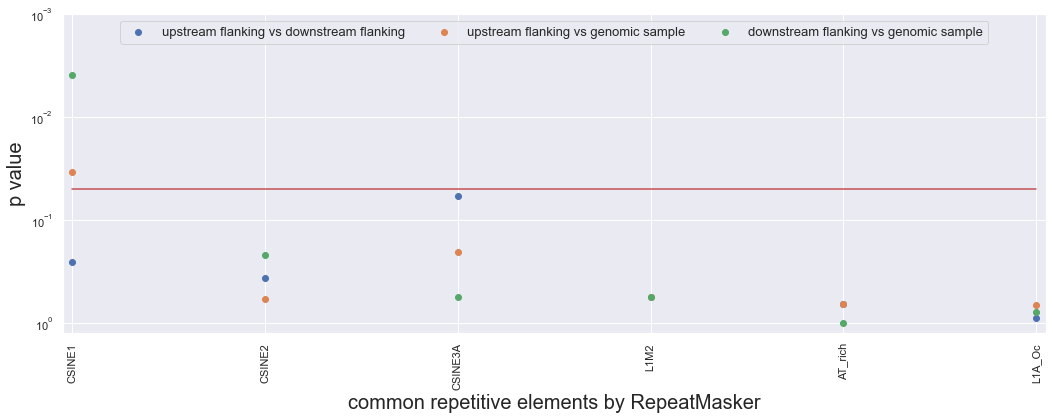

In [174]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.1])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)

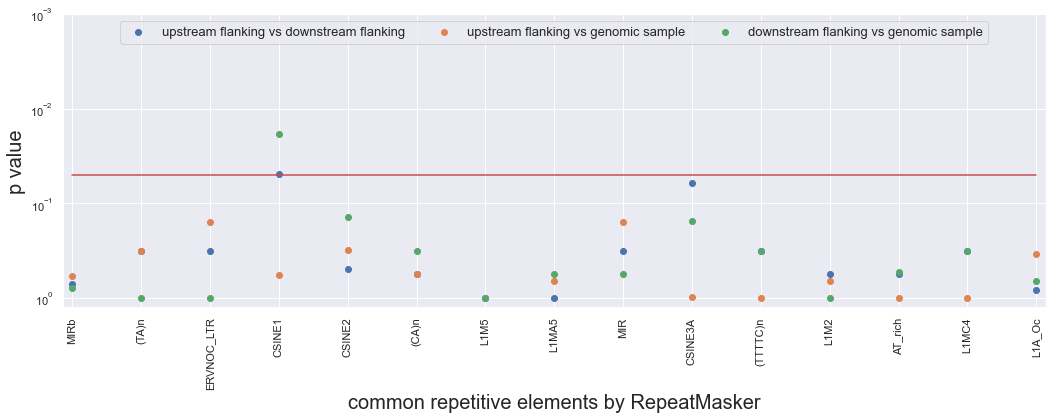

In [122]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.1])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)

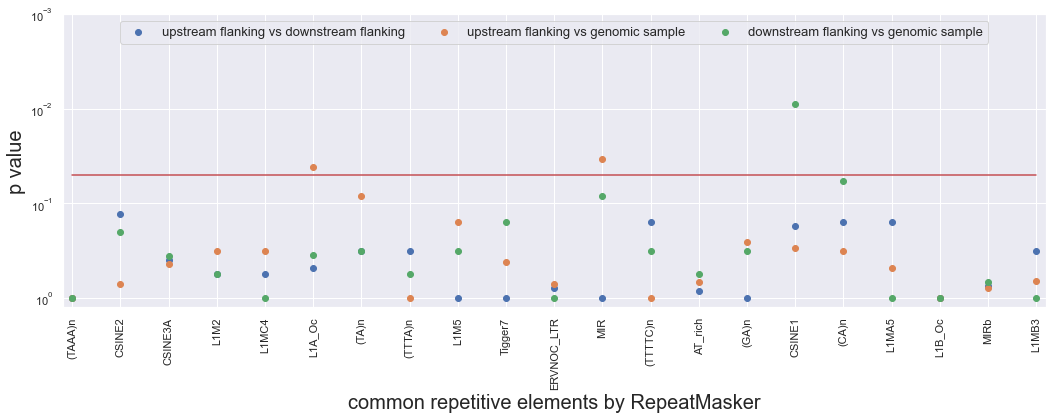

In [133]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.1])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)

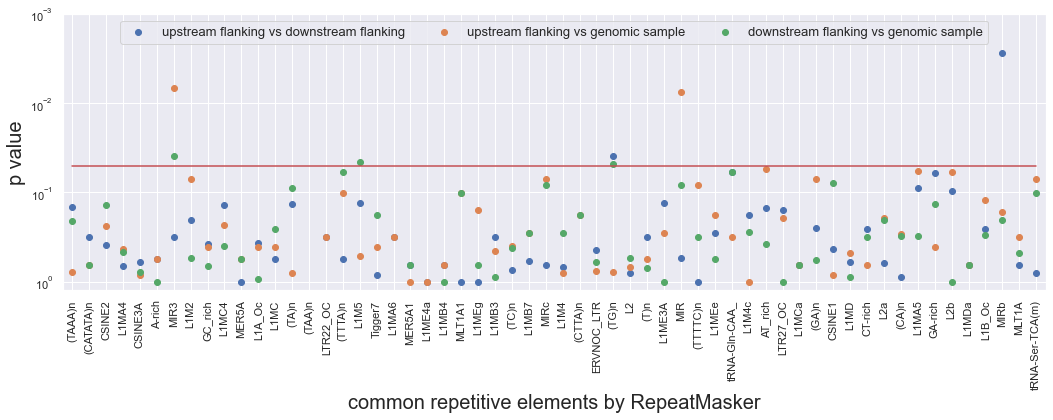

In [144]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.1])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)

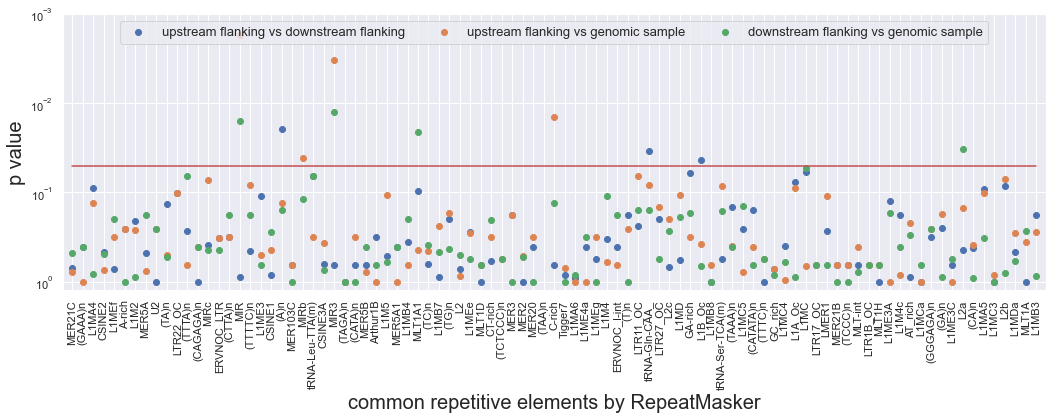

In [236]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.1])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)